## DATA CLEANING A VEHICLE INSURANCE DATASET

### 1. Introduction
I wanted to do some EDA and hypothesis testing with this dataset using R, but came to realise the dataset is very messy. I attempted to clean it using R, but one month down the line I was going in circles, so I attempted doing the cleaning with Python and it was mostly a success, at least it didn't make me want to cry that much.

So here's my attempt at cleaning the dataset, any feedback is welco.s.

## 2. Importing libraries and the datasets

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import files
vdf1 = pd.read_csv("C:\\Users\\Skitah Wambui\\OneDrive\\Desktop\\motor_data11-14lats.CSV")
vdf2 = pd.read_csv("C:\\Users\\Skitah Wambui\\OneDrive\\Desktop\\motor_data14-2018.CSV")

In [3]:
# join the two datasets
frames = [vdf1, vdf2]
vdf = pd.concat(frames)

In [35]:
# convert the data to a dataframe
vdf = pd.DataFrame(vdf)

In [7]:
# check the shape of the dataframe
vdf.shape

(802036, 16)

In [8]:
# check the head
vdf.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [9]:
# check the tail 
vdf.tail()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
508494,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508495,0,02-FEB-18,01-FEB-19,12,1202,0.0,299.51,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508496,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508497,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508498,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350505,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN


## 3. Data Cleaning

## 3.1 Organize the data

In [10]:
# find and remove index duplicates
vdf = vdf[~vdf.index.duplicated()]
vdf.shape

(508499, 16)

In [11]:
# check the column names
print(vdf.columns)

Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


In [12]:
# check the datatypes
vdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508499 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                508499 non-null  int64  
 1   INSR_BEGIN         508499 non-null  object 
 2   INSR_END           508499 non-null  object 
 3   EFFECTIVE_YR       508495 non-null  object 
 4   INSR_TYPE          508499 non-null  int64  
 5   INSURED_VALUE      508499 non-null  float64
 6   PREMIUM            508483 non-null  float64
 7   OBJECT_ID          508499 non-null  int64  
 8   PROD_YEAR          508383 non-null  float64
 9   SEATS_NUM          508340 non-null  float64
 10  CARRYING_CAPACITY  385878 non-null  float64
 11  TYPE_VEHICLE       508499 non-null  object 
 12  CCM_TON            508497 non-null  float64
 13  MAKE               508494 non-null  object 
 14  USAGE              508499 non-null  object 
 15  CLAIM_PAID         35454 non-null   float64
dtypes: floa

## 3.2 Shaping the columns

In [13]:
# check for duplicates
duplicates = vdf.duplicated().sum()
print(duplicates)

177


In [14]:
# remove duplicates
vdf = vdf.drop_duplicates()

I'll drop the effective year column as I was unable to find its purpose.

In [15]:
# drop columns 
vdf.drop(columns = 'EFFECTIVE_YR', inplace = True)

## 3.3 Dealing with Missing Values

In [16]:
# check for null values
vdf.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  16
OBJECT_ID                 0
PROD_YEAR               116
SEATS_NUM               159
CARRYING_CAPACITY    122586
TYPE_VEHICLE              0
CCM_TON                   2
MAKE                      5
USAGE                     0
CLAIM_PAID           472868
dtype: int64

Our dataset has a large number of null values. Because the nulls are so few in some columns we'll drop them. The ones with a high number of nulls we'll handle later.

In [17]:
# drop na values for some columns
vdf = vdf.dropna(subset=['PREMIUM', 'PROD_YEAR', 'CCM_TON','MAKE', 'SEATS_NUM'])
vdf.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                   0
OBJECT_ID                 0
PROD_YEAR                 0
SEATS_NUM                 0
CARRYING_CAPACITY    122446
TYPE_VEHICLE              0
CCM_TON                   0
MAKE                      0
USAGE                     0
CLAIM_PAID           472692
dtype: int64

In the claim paid column I will replace null values with zero, because a null claim means no claim was paid

In [18]:
# replace null values with 0 in the claim_paid column
vdf['CLAIM_PAID'].fillna(0, inplace = True)

In [19]:
# create a new column to determine if the claim was paid
vdf['CLAIM'] = np.where(vdf['CLAIM_PAID'] == 0, 'NO', 'YES')
vdf

,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,CLAIM
0,0,08-AUG-13,07-AUG-14,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO
1,0,08-AUG-12,07-AUG-13,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO
2,0,08-AUG-11,07-AUG-12,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO
3,0,08-JUL-11,07-AUG-11,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO
4,0,08-AUG-13,07-AUG-14,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,0,02-FEB-18,01-FEB-19,1202,0.00,294.510,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00,NO
508495,0,02-FEB-18,01-FEB-19,1202,0.00,299.510,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00,NO
508496,0,02-FEB-18,01-FEB-19,1202,0.00,294.510,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00,NO
508497,0,02-FEB-18,01-FEB-19,1202,0.00,294.510,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00,NO


I'll create new columns for sex and insurance type so we get rid of the numerical values.

In [20]:
# map the sex column
vdf.loc[:,'GENDER'] = vdf['SEX'].map({0: 'Legal Entity', 1: 'Male', 2: 'Female'})

# drop the sex column
vdf.drop(columns = 'SEX', inplace = True)

In [21]:
# map the insr_type column
vdf.loc[:,'TYPE_INSR'] = vdf['INSR_TYPE'].map({1201: 'Private', 1202:'Commercial', 1204: 'Motor Trade Road Risk'})

# drop the insr_type column
vdf.drop(columns = 'INSR_TYPE', inplace = True)

I wanted to convert the insr_end, insr_begin columns to datetime and then find the insurance length. Depending on the day, pd.to_datetime would work and sometimes it would not. This time it did not work. The issue was with the month in caps, it messed up the format.

In [24]:
# convert the datatype to datetime in insr_end, insr_begin
# function to parse dates
def parse_date(date_str):
    # convert the month abbr to numerical rep
    month_dict = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06',
                  'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
    parts = date_str.split('-')
    # extract day, month, and year from the date string
    day = parts[0]
    month = month_dict[parts[1]]
    year = parts[2]
    # combine and return as a date
    return pd.to_datetime(f'{day}-{month}-{year}', format = '%d-%m-%y')

# apply function on the columns
vdf['INSR_BEGIN'] = vdf['INSR_BEGIN'].apply(parse_date)

vdf['INSR_END'] = vdf['INSR_END'].apply(parse_date)

# check the datatypes
vdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508138 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   INSR_BEGIN         508138 non-null  datetime64[ns]
 1   INSR_END           508138 non-null  datetime64[ns]
 2   INSURED_VALUE      508138 non-null  float64       
 3   PREMIUM            508138 non-null  float64       
 4   OBJECT_ID          508138 non-null  int64         
 5   PROD_YEAR          508138 non-null  float64       
 6   SEATS_NUM          508138 non-null  float64       
 7   CARRYING_CAPACITY  385692 non-null  float64       
 8   TYPE_VEHICLE       508138 non-null  object        
 9   CCM_TON            508138 non-null  float64       
 10  MAKE               508138 non-null  object        
 11  USAGE              508138 non-null  object        
 12  CLAIM_PAID         508138 non-null  float64       
 13  CLAIM              508138 non-null  object       

In [25]:
# create a new column to show the insurance length (insr_end - insr_begin)
vdf['INSR_LENGTH'] = (vdf['INSR_END'] - vdf['INSR_BEGIN']).dt.days / 30.44
vdf['INSR_LENGTH'] = vdf['INSR_LENGTH'].astype(int)

Let's see how the data looks so far

In [26]:
# check the head
vdf.head()

,INSR_BEGIN,INSR_END,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,CLAIM,GENDER,TYPE_INSR,INSR_LENGTH
0,2013-08-08,2014-08-07,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial,11
1,2012-08-08,2013-08-07,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial,11
2,2011-08-08,2012-08-07,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial,11
3,2011-07-08,2011-08-07,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial,0
4,2013-08-08,2014-08-07,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43,YES,Legal Entity,Commercial,11


In [27]:
# check for inconsistent data
vdf.describe()

,INSR_BEGIN,INSR_END,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID,INSR_LENGTH
count,508138,508138,5.081380e+05,508138.000000,5.081380e+05,508138.000000,508138.000000,385692.000000,508138.000000,5.081380e+05,508138.000000
mean,2014-08-09 10:06:36.997666048,2015-07-22 00:48:26.026315520,4.899990e+05,7040.074980,5.000529e+09,2005.063748,5.931251,495.627136,3033.209466,1.920993e+04,10.447977
min,2011-07-01 00:00:00,2011-07-13 00:00:00,0.000000e+00,0.000000,5.000018e+09,1950.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2012-08-07 00:00:00,2013-07-10 00:00:00,0.000000e+00,668.900000,5.000176e+09,2000.000000,1.000000,0.000000,200.000000,0.000000e+00,11.000000
50%,2014-01-01 00:00:00,2014-12-31 00:00:00,1.000000e+05,2700.300000,5.000461e+09,2008.000000,3.000000,6.000000,2446.000000,0.000000e+00,11.000000
75%,2016-10-23 00:00:00,2017-10-12 00:00:00,7.000000e+05,8793.740000,5.000863e+09,2013.000000,4.000000,32.600000,4164.000000,0.000000e+00,11.000000
max,2018-06-30 00:00:00,2019-06-29 00:00:00,2.500000e+08,542942.150000,5.001351e+09,2018.000000,199.000000,1000000.000000,20000.000000,1.524458e+08,17.000000
std,NaN,NaN,9.315477e+05,10616.134041,3.781568e+05,10.497571,13.011068,3964.520421,3420.681396,4.662878e+05,2.206908


Looking at the data, there is some inconsistent data. Some columns have 0 values when they shouldn't, while for others, the 3rd quantile and max values have a wide difference alluding to the existence of outliers.

## 3.4 Dealing with 0 values

In [28]:
# count how many 0s are in columns
seats_zeros = (vdf['SEATS_NUM'] == 0).sum()
print('Count of zeros in seats', seats_zeros)

insured_value_zeros = (vdf['INSURED_VALUE'] == 0).sum()
print('Count of zeros in insured value', insured_value_zeros)

premium_zeros = (vdf['PREMIUM'] == 0).sum()
print('Count of zeros in premium', premium_zeros)

carrying_capacity_zeros = (vdf['CARRYING_CAPACITY'] == 0).sum()
print('Count of zeros in carrying capacity', carrying_capacity_zeros)

Count of zeros in seats 39464
Count of zeros in insured value 231456
Count of zeros in premium 23
Count of zeros in carrying capacity 152895


For the premium column, we'll drop the 0s. For the other columns, as there's a large number of 0s, I'll replace it with the median 

In [32]:
# drop 0s in the premium column
vdf = vdf[vdf['PREMIUM'] != 0]

In [36]:
# replace 0s in the seats_num column with median
# Calculate the median of each vehicle type's number of seats
median_seats_by_type = vdf.groupby('TYPE_VEHICLE')['SEATS_NUM'].transform('median')[0]

# Replace 0 values with the median of each vehicle type
vdf['SEATS_NUM'] = vdf['SEATS_NUM'].replace(0, median_seats_by_type)

In [37]:
# replace 0s with median in the insured value column
# Calculate the median of each vehicle type by make and production year
median_insured_value = vdf.groupby(['TYPE_VEHICLE','MAKE', 'PROD_YEAR'])['INSURED_VALUE'].transform('median')[0]

# replace the 0s with the median
vdf['INSURED_VALUE'] = vdf['INSURED_VALUE'].replace(0, median_insured_value)

In [38]:
# replace the 0s in the carrying capacity column with median
# calculate the median of each vehicle type and make
median_carrying_capacity = vdf.groupby(['TYPE_VEHICLE','MAKE'])['CARRYING_CAPACITY'].transform('median')[0]

# replace 0s with the median
vdf['CARRYING_CAPACITY'] = vdf['CARRYING_CAPACITY'].replace(0, median_carrying_capacity)

In [39]:
# count how many 0s are in columns
seats_zeros = (vdf['SEATS_NUM'] == 0).sum()
print('Count of zeros in seats', seats_zeros)

insured_value_zeros = (vdf['INSURED_VALUE'] == 0).sum()
print('Count of zeros in insured value', insured_value_zeros)

premium_zeros = (vdf['PREMIUM'] == 0).sum()
print('Count of zeros in premium', premium_zeros)

carrying_capacity_zeros = (vdf['CARRYING_CAPACITY'] == 0).sum()
print('Count of zeros in carrying capacity', carrying_capacity_zeros)

Count of zeros in seats 0
Count of zeros in insured value 0
Count of zeros in premium 0
Count of zeros in carrying capacity 0


## 3.5 Handling outliers

We'll remove outliers using the z-score method

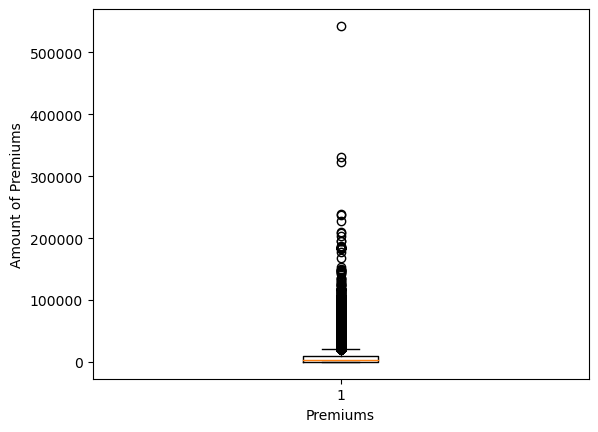

In [33]:
# check for outliers in the premium column
plt.boxplot(vdf['PREMIUM'])
plt.xlabel('Premiums')
plt.ylabel('Amount of Premiums')
plt.show()

Before outliers are removed: 508115
After outliers are removed: 465889


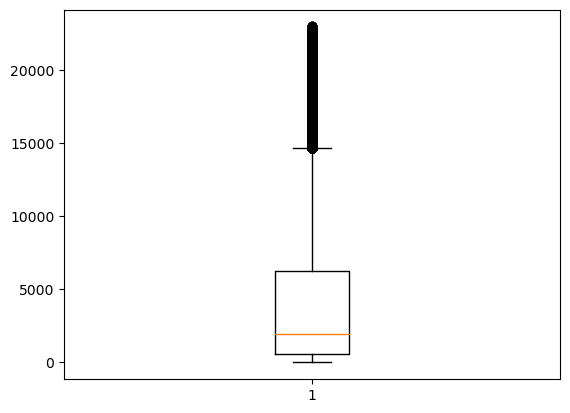

In [40]:
# remove outliers using z score method
print('Before outliers are removed:', len(vdf))
    
# find lower and upper limit
lower_limit = vdf['PREMIUM'].mean() - (1.5* vdf['PREMIUM'].std())
upper_limit = vdf['PREMIUM'].mean() + (1.5* vdf['PREMIUM'].std())

# find outliers
vdf_outliers = np.where(vdf['PREMIUM'] > upper_limit, True,
                        np.where(vdf['PREMIUM'] < lower_limit, True, False))

# remove outliers
vdf= vdf.loc[~(vdf_outliers)]

print('After outliers are removed:', len(vdf))

# plot 
plt.boxplot(vdf['PREMIUM'])
plt.show()

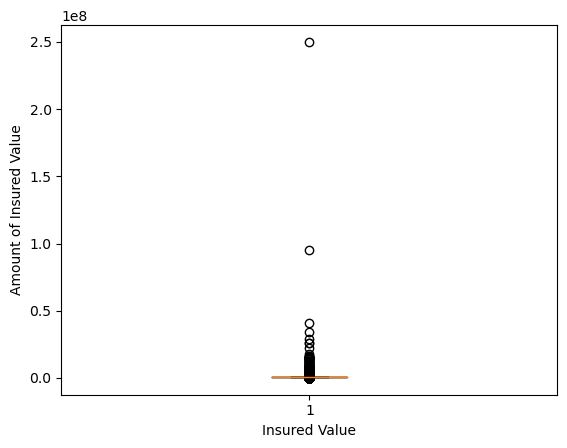

In [41]:
# check for outliers in the premium column
plt.boxplot(vdf['INSURED_VALUE'])
plt.xlabel('Insured Value')
plt.ylabel('Amount of Insured Value')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


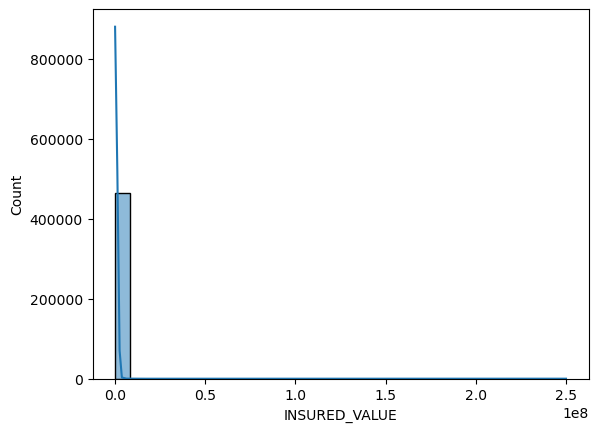

In [42]:
# check the distribution of insured value before removing outliers
sns.histplot(data=vdf, x='INSURED_VALUE', bins = 30, kde=True)
plt.show()

Before outliers are removed: 465889
After outliers are removed: 443727


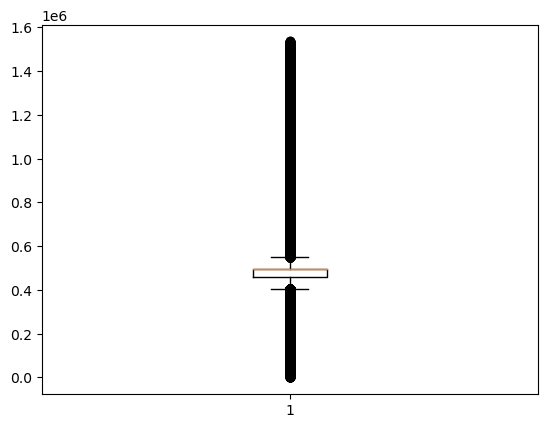

In [43]:
# remove outliers using z score method
print('Before outliers are removed:', len(vdf))

# find the lower and upper limit
lower_limit = vdf['INSURED_VALUE'].mean() - (1.5 * vdf['INSURED_VALUE'].std())
upper_limit = vdf['INSURED_VALUE'].mean() + (1.5 * vdf['INSURED_VALUE'].std())

# find the outliers
vdf_outliers = np.where(vdf['INSURED_VALUE'] > upper_limit, True,
                       np.where(vdf['INSURED_VALUE'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After outliers are removed:', len(vdf))

# plot
plt.boxplot(vdf['INSURED_VALUE'])
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


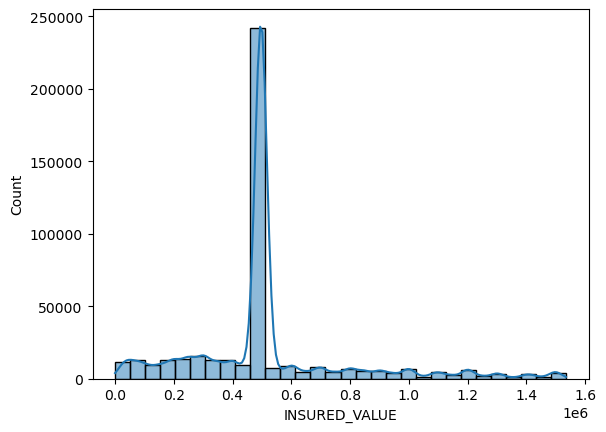

In [44]:
# check the distribution of insured value after removing outliers
sns.histplot(data=vdf, x='INSURED_VALUE', bins = 30, kde=True)
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribution of carrying capacity per vehicle type')

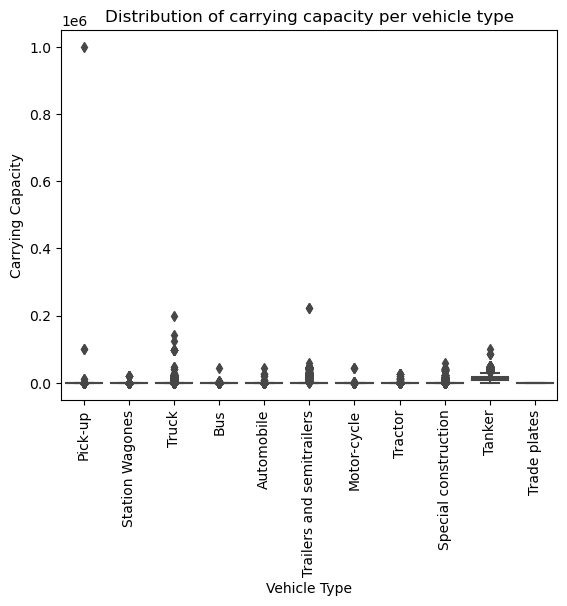

In [45]:
# check the distribution of carrying capacity per vehicle type
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.ylabel('Carrying Capacity')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of carrying capacity per vehicle type')

Before the outliers are removed: 443727
After the outliers are removed: 438647


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribution of carrying capacity per vehicle type')

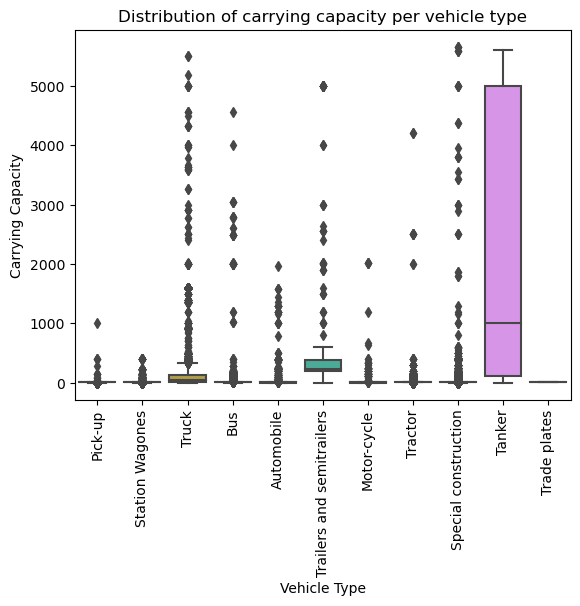

In [46]:
# remove outliers in the carrying capacity column
print('Before the outliers are removed:', len(vdf))

# find the upper and lower limits
lower_limit = vdf['CARRYING_CAPACITY'].mean() - (1.5 * vdf['CARRYING_CAPACITY'].std())
upper_limit = vdf['CARRYING_CAPACITY'].mean() + (1.5 * vdf['CARRYING_CAPACITY'].std())

# find outliers
vdf_outliers = np.where(vdf['CARRYING_CAPACITY'] > upper_limit, True,
                       np.where(vdf['CARRYING_CAPACITY'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After the outliers are removed:', len(vdf))

# plot
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.ylabel('Carrying Capacity')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of carrying capacity per vehicle type')
plt.title('Distribution of carrying capacity per vehicle type')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribution of number of seats per vehicle type')

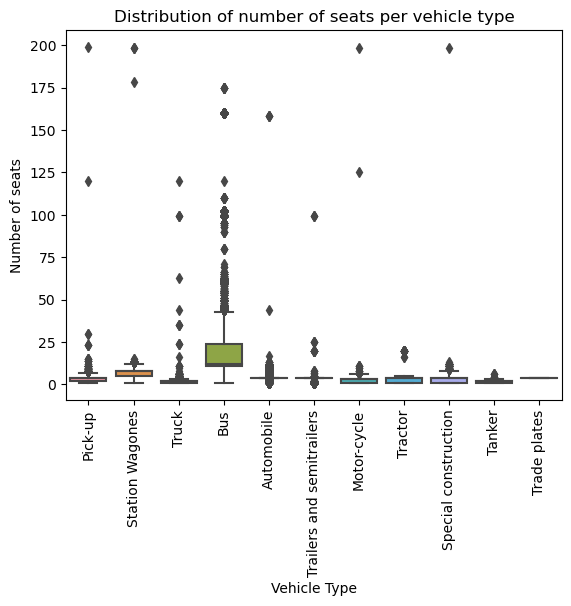

In [47]:
# check for outliers in number of seats column per vehicle
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.ylabel('Number of seats')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of number of seats per vehicle type')

Before the outliers are removed: 398525
After the outliers are removed: 384652


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribution of number of seats per vehicle type')

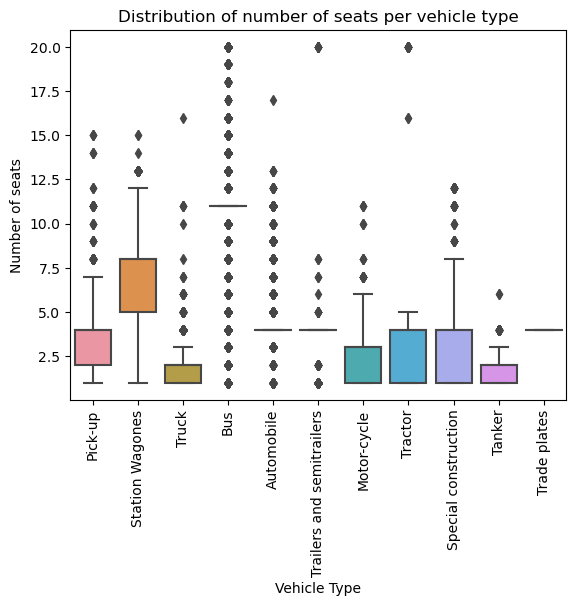

In [66]:
# remove outliers in the number of seats column
print('Before the outliers are removed:', len(vdf))

# find lower and upper limits
lower_limit = vdf['SEATS_NUM'].mean() - (1.5 * vdf['SEATS_NUM'].std())
upper_limit = vdf['SEATS_NUM'].mean() + (1.5 * vdf['SEATS_NUM'].std())

# find outliers
vdf_outliers = np.where(vdf['SEATS_NUM'] > upper_limit, True,
                       np.where(vdf['SEATS_NUM'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After the outliers are removed:', len(vdf))

# plot
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.ylabel('Number of seats')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of number of seats per vehicle type')

I'll export the dataset so I can do some EDA and hypothesis testing on R

In [48]:
# export to csv file
vdf.to_csv('C:/Users/Skitah Wambui/OneDrive/Desktop/clean_vehicle_insurance_dataset.csv', index = False)